# Meghanjali Chennupati (U30308400)

##  In this notebook I would like to demonstrate building a Neural network model using MLP classifier , keras wide, deep neural network and hyperparameter tuning to my models and observe the metrics .

##  I will also compare my results to the results of the previous models which I have done in assignment -1 and see the best model and metric for my data set

# Description of the data set

# Description of the data set:

The data set is about CRYPTOTHERAPHY ANALYSIS.This data set provides patients characterstics after the tratment the level of cancer.
It states whether the cancer level is benign(1) or malignant(0). This data set contains the following attributes:
1. SEX- It indicates the gender of the patient whetehrthe patient is a male or female.(1=male,2=female)
2. AGE- It indicates the age of the patient.
3. Time- This column indicates the time for the treatment in seconds.
4. Number of warts- This column indicates the numbe rof warts that are grown on a patients body. ( Warts are skin growths caused by a virus. The virus infects the top layer of skin, causing it to grow rapidly.Warts can grow anywhere on your body. Most warts go away on their own, but they may come back.)
5. Type : It indicates the type of wart. ( there are mainly three types of warts . 1,2,3 ( common warts, flat,filtform)
6. Area: The composition of wart .
7. Result of the tratment: It indicates the level of cancer after tratment.

The target variable is Result of the tratment. It is a binary classifier. benign(1) or malignant(0).
This data set is a classification type of problem.
The data set contains the instances of the 90 patients that are obtained from the results of cryptotheraphy treatment.

Source of the data set: It is taken from the Mashhad University of Medical Sciences, Mashhad, Iran. Fahime Khozeimeh, MD, Pouran Layegh, Professor of Dermatology and Roohallah Alizadehsani, PhD student and Mohamad Roshanzamir, PhD candidate.

It is published in UCI MACHINE LEARNING REPOSITORY: https://archive.ics.uci.edu/ml/datasets/Cryotherapy+Dataset+



# Business problem statement and its purpose:
1. The analysis of this data set will identify the results of the cancer treatment. It is a health care industry domain.
2. Purpose :  This will helps the to explore and draw some inferences that may help the people to undergo the Cryotherapic treatment.
3. It also helps the crytotheraphists to see the sttaistics and how well their treatment serves the people. How they can improve the level of treatment.
4. It also helps to identify what age groups of patients  the treatment is getting malignant and what age groups of people is getting benign 
5. In this notebook I would like to do data preprocessing that is ready to apply modleing .
6. For this assignment I would like to use the following algorithms (Discussed in class so far) to identify how well my models are trained and see how it performs of test data and if a new data is given it can able to predict the likelihood of results of level of tretament .


## In my assignment-1 data prep notebook I already done the data preprocessing and saved them to files and I am using those files directly to load and fit my models.

# Load libraries

In [1]:
import os
import tensorflow as tf
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

In [2]:
from __future__ import print_function
import numpy as np
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
from sklearn import datasets


np.random.seed(1)

# Load the data

In [3]:
X_train = pd.read_csv("crypto_data_train_X.csv")
X_test = pd.read_csv("crypto_data_test_X.csv")
y_train = pd.read_csv("crypto_data_train_y.csv")
y_test = pd.read_csv("crypto_data_test_y.csv")

# Building a neural network model using Sk learn MLP classifier

In [4]:
%%time

model1 = MLPClassifier(
    hidden_layer_sizes=(60,50,40), 
    activation = 'relu',
    solver='adam',
    alpha=0.0001, # Strength of the L2 regularization term
    batch_size='auto',
    learning_rate = 'constant',
    learning_rate_init = 0.001,
    max_iter=200,
    tol=0.00001, 
    early_stopping = True,
    n_iter_no_change = 5,
    verbose=True
    
)
_ = model1.fit(X_train, y_train)

# Currently (version 1.2.2), MLPClassifier supports only the Cross-Entropy loss function.
# https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html

Iteration 1, loss = 1.25243384
Validation score: 0.428571
Iteration 2, loss = 1.06028859
Validation score: 0.428571
Iteration 3, loss = 0.95398818
Validation score: 0.571429
Iteration 4, loss = 0.70964856
Validation score: 0.571429
Iteration 5, loss = 0.77343455
Validation score: 0.571429
Iteration 6, loss = 0.77634682
Validation score: 0.571429
Iteration 7, loss = 0.65382765
Validation score: 0.428571
Iteration 8, loss = 0.61118733
Validation score: 0.428571
Iteration 9, loss = 0.64683433
Validation score: 0.428571
Validation score did not improve more than tol=0.000010 for 5 consecutive epochs. Stopping.
CPU times: total: 62.5 ms
Wall time: 64.5 ms


In [5]:
model1.loss_curve_

[1.2524338365377083,
 1.0602885936287318,
 0.9539881805889544,
 0.7096485577454671,
 0.7734345514350579,
 0.7763468211359932,
 0.6538276534182239,
 0.6111873319746912,
 0.646834328792195]

In [6]:
%%time
y_pred = model1.predict(X_test)

CPU times: total: 0 ns
Wall time: 3 ms


In [7]:
print(classification_report(y_test, y_pred, digits=4))

              precision    recall  f1-score   support

           0     0.6087    0.9333    0.7368        15
           1     0.7500    0.2500    0.3750        12

    accuracy                         0.6296        27
   macro avg     0.6793    0.5917    0.5559        27
weighted avg     0.6715    0.6296    0.5760        27



In [8]:
y_pred = model1.predict(X_test)
y_pred

array([0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0], dtype=int64)

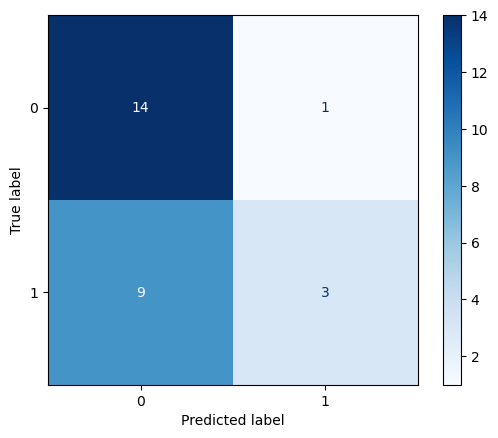

In [9]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.show()

# Hyper parameter tuning using Randomised search cv for MLP classifier

In [10]:
%%time

param_distributions = {
    'hidden_layer_sizes': [ (64,), (128,),(128,64), (64,128), (64,128,196), (196,128,64)],
    'activation': ['logistic', 'tanh', 'relu'],
    'solver': ['adam', 'sgd'],
    'alpha': [0, .0001, .0005, .001, .005],
    'batch_size': [25, 50, 100],
    'learning_rate': ['constant', 'invscaling', 'adaptive'],
    'learning_rate_init': [0.0005, 0.001, 0.005, 0.01],
    'max_iter': [5000],
    'tol': [0.000005, 0.00001, 0.00005],
    'early_stopping':[True],
    'n_iter_no_change':[5],
}

random_search = RandomizedSearchCV(
    estimator = MLPClassifier(), # a blank slate... RandomizedSearchCV will send parameters.
    param_distributions=param_distributions, 
    cv=3, 
    n_iter=300,
    scoring='f1_macro', # note that we could also choose any other scoring metric that is appropriate for a multi-class problem - such as f1_macro, f1_micro, f1_weighted, etc.
    verbose=1, 
    n_jobs=-1,  # n_jobs=-1 will utilize all available CPUs 
    return_train_score=True
)

_ = random_search.fit(X_train, y_train)


Fitting 3 folds for each of 300 candidates, totalling 900 fits
CPU times: total: 1.52 s
Wall time: 10.9 s


In [13]:
model2 = random_search.best_estimator_

print(random_search.best_params_)

{'tol': 5e-05, 'solver': 'adam', 'n_iter_no_change': 5, 'max_iter': 5000, 'learning_rate_init': 0.005, 'learning_rate': 'constant', 'hidden_layer_sizes': (64,), 'early_stopping': True, 'batch_size': 25, 'alpha': 0.0001, 'activation': 'tanh'}


In [12]:
%%time
y_pred = model2.predict(X_test)

print(classification_report(y_test, y_pred, digits=4))

              precision    recall  f1-score   support

           0     0.6667    0.4000    0.5000        15
           1     0.5000    0.7500    0.6000        12

    accuracy                         0.5556        27
   macro avg     0.5833    0.5750    0.5500        27
weighted avg     0.5926    0.5556    0.5444        27

CPU times: total: 15.6 ms
Wall time: 13.3 ms


In [14]:
y_pred = model2.predict(X_test)
y_pred

array([1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 1], dtype=int64)

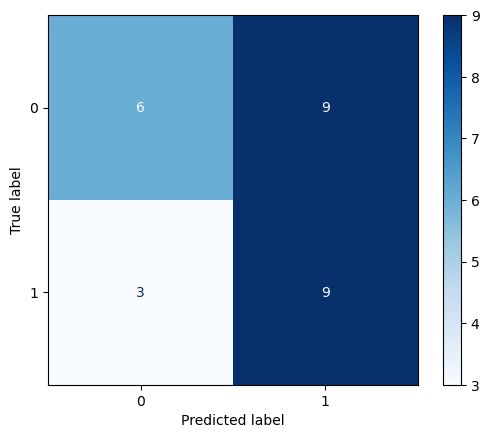

In [15]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.show()

# Hyper parameter tuning using grid search cv for MLP classifier

In [16]:
%%time

param_distributions = {
    'hidden_layer_sizes': [(64,)],
    'activation': ['tanh'],
    'solver': ['sgd'],
    'alpha': [0.0001],
    'batch_size': [25],
    'learning_rate': ['adaptive'],
    'learning_rate_init': [0.005],
    'max_iter': [5000],
    'tol': [0.00005],
    'early_stopping':[True],
    'n_iter_no_change':[5],
}

grid_search = GridSearchCV(
    estimator = MLPClassifier(), # a blank slate... RandomizedSearchCV will send parameters.
    param_grid=param_distributions, 
    cv=5,
    scoring='f1_macro', # note that we could also choose any other scoring metric that is appropriate for a multi-class problem - such as f1_macro, f1_micro, f1_weighted, etc.
    verbose=1, 
    n_jobs=-1,  # n_jobs=-1 will utilize all available CPUs 
    return_train_score=True
)

_ = grid_search.fit(X_train, y_train)


Fitting 5 folds for each of 1 candidates, totalling 5 fits
CPU times: total: 62.5 ms
Wall time: 154 ms


In [17]:
model2 = grid_search.best_estimator_

print(grid_search.best_params_)

{'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 25, 'early_stopping': True, 'hidden_layer_sizes': (64,), 'learning_rate': 'adaptive', 'learning_rate_init': 0.005, 'max_iter': 5000, 'n_iter_no_change': 5, 'solver': 'sgd', 'tol': 5e-05}


In [18]:
%%time
y_pred = model2.predict(X_test)

print(classification_report(y_test, y_pred, digits=4))

              precision    recall  f1-score   support

           0     0.4000    0.1333    0.2000        15
           1     0.4091    0.7500    0.5294        12

    accuracy                         0.4074        27
   macro avg     0.4045    0.4417    0.3647        27
weighted avg     0.4040    0.4074    0.3464        27

CPU times: total: 15.6 ms
Wall time: 16.2 ms


In [19]:
y_pred = model2.predict(X_test)
y_pred

array([1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1], dtype=int64)

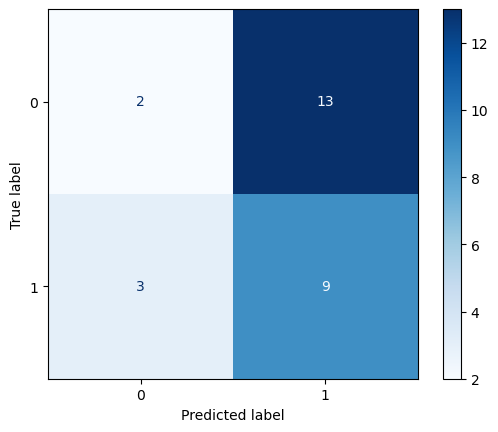

In [20]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.show()

# Building neural network model using Keras

# Wide network

In [48]:
from tensorflow import keras
from tensorflow.keras import layers

model_wide = keras.models.Sequential()
model_wide.add(keras.layers.Input(6))
model_wide.add(keras.layers.Dense(200, activation="relu"))
model_wide.add(keras.layers.Dense(1, activation="sigmoid"))

In [49]:
model_wide.compile(loss="binary_crossentropy", optimizer="adam", metrics=['accuracy'])

In [50]:
history = model_wide.fit(X_train, y_train, epochs=200, validation_data=(X_test, y_test))

Epoch 1/200
2/2 [==============================] - 1s 175ms/step - loss: 1.5651 - accuracy: 0.4286 - val_loss: 1.0991 - val_accuracy: 0.5926
Epoch 2/200
2/2 [==============================] - 0s 32ms/step - loss: 1.3520 - accuracy: 0.6190 - val_loss: 1.9093 - val_accuracy: 0.4815
Epoch 3/200
2/2 [==============================] - 0s 32ms/step - loss: 1.3292 - accuracy: 0.6349 - val_loss: 1.4597 - val_accuracy: 0.4074
Epoch 4/200
2/2 [==============================] - 0s 33ms/step - loss: 1.0528 - accuracy: 0.6190 - val_loss: 0.6891 - val_accuracy: 0.5926
Epoch 5/200
2/2 [==============================] - 0s 34ms/step - loss: 0.6231 - accuracy: 0.6349 - val_loss: 0.6694 - val_accuracy: 0.5556
Epoch 6/200
2/2 [==============================] - 0s 33ms/step - loss: 0.7411 - accuracy: 0.5238 - val_loss: 0.6781 - val_accuracy: 0.6296
Epoch 7/200
2/2 [==============================] - 0s 34ms/step - loss: 0.7172 - accuracy: 0.5556 - val_loss: 0.6577 - val_accuracy: 0.6667
Epoch 8/200
2/2 [==

In [51]:
loss, accuracy = model_wide.evaluate(X_test, y_test)

1/1 [==============================] - 0s 31ms/step - loss: 0.4220 - accuracy: 0.8889


In [52]:
print(f"Loss {loss:.5f}\nAccuracy {accuracy:.4f}")

Loss 0.42197
Accuracy 0.8889


In [53]:
model_wide.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 200)               1400      
                                                                 
 dense_17 (Dense)            (None, 1)                 201       
                                                                 
Total params: 1,601
Trainable params: 1,601
Non-trainable params: 0
_________________________________________________________________


In [54]:
import collections

# for reference, list the frequency of each digit found in the y_test data
print(sorted(collections.Counter(y_test).items(), key=lambda i: i[0]))

[('Result_of_Treatment', 1)]


1/1 [==============================] - 0s 57ms/step


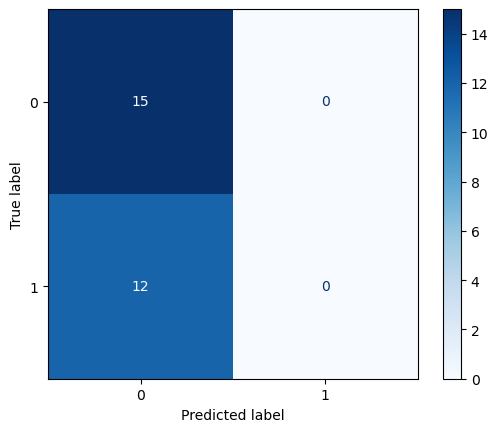

In [55]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix

# display the confusion matrix
y_pred = model_wide.predict(X_test).argmax(axis=1)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.show()

In [57]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred, digits=4))

              precision    recall  f1-score   support

           0     0.5556    1.0000    0.7143        15
           1     0.0000    0.0000    0.0000        12

    accuracy                         0.5556        27
   macro avg     0.2778    0.5000    0.3571        27
weighted avg     0.3086    0.5556    0.3968        27



# 2.2 Deep Network¶

In [58]:
from tensorflow import keras
from tensorflow.keras import layers

In [59]:
model_deep = keras.models.Sequential()
model_deep.add(keras.layers.Input(6))
model_deep.add(keras.layers.Dense(200, activation="relu"))
model_deep.add(keras.layers.Dense(200, activation="relu"))
model_deep.add(keras.layers.Dense(200, activation="relu"))
model_deep.add(keras.layers.Dense(1, activation="sigmoid"))

In [60]:
# Other syntax
input_ = keras.layers.Input(6)
hidden1 = keras.layers.Dense(128, activation="relu")(input_)
hidden2 = keras.layers.Dense(128, activation="relu")(hidden1)
hidden3 = keras.layers.Dense(128, activation="relu")(hidden2)
hidden4 = keras.layers.Dense(128, activation="relu")(hidden3)
output = keras.layers.Dense(1, activation="sigmoid")(hidden4)
model_deep = keras.Model(inputs=[input_], outputs=[output])

In [61]:
model_deep.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [62]:
history = model_deep.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test))


Epoch 1/50
2/2 [==============================] - 1s 201ms/step - loss: 0.8397 - accuracy: 0.6508 - val_loss: 2.6463 - val_accuracy: 0.3704
Epoch 2/50
2/2 [==============================] - 0s 33ms/step - loss: 1.3640 - accuracy: 0.6508 - val_loss: 0.6975 - val_accuracy: 0.5556
Epoch 3/50
2/2 [==============================] - 0s 33ms/step - loss: 0.8105 - accuracy: 0.4286 - val_loss: 0.8019 - val_accuracy: 0.5556
Epoch 4/50
2/2 [==============================] - 0s 36ms/step - loss: 0.8438 - accuracy: 0.4444 - val_loss: 0.6794 - val_accuracy: 0.5556
Epoch 5/50
2/2 [==============================] - 0s 36ms/step - loss: 0.5914 - accuracy: 0.6984 - val_loss: 1.0754 - val_accuracy: 0.4444
Epoch 6/50
2/2 [==============================] - 0s 34ms/step - loss: 0.7071 - accuracy: 0.6825 - val_loss: 0.8024 - val_accuracy: 0.4444
Epoch 7/50
2/2 [==============================] - 0s 35ms/step - loss: 0.5787 - accuracy: 0.6984 - val_loss: 0.6710 - val_accuracy: 0.5556
Epoch 8/50
2/2 [==========

In [63]:
loss, accuracy = model_deep.evaluate(X_test, y_test)
print(f"Loss {loss:.5f}\nAccuracy {accuracy:.4f}")

1/1 [==============================] - 0s 25ms/step - loss: 0.5036 - accuracy: 0.9259
Loss 0.50364
Accuracy 0.9259


In [64]:
model_deep.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 6)]               0         
                                                                 
 dense_22 (Dense)            (None, 128)               896       
                                                                 
 dense_23 (Dense)            (None, 128)               16512     
                                                                 
 dense_24 (Dense)            (None, 128)               16512     
                                                                 
 dense_25 (Dense)            (None, 128)               16512     
                                                                 
 dense_26 (Dense)            (None, 1)                 129       
                                                                 
Total params: 50,561
Trainable params: 50,561
Non-trainable

[('Result_of_Treatment', 1)]
1/1 [==============================] - 0s 65ms/step


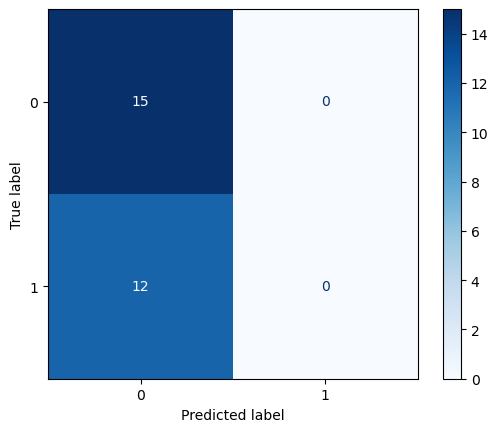

In [65]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix

# for reference, list the frequency of each digit found in the y_test data
print(sorted(collections.Counter(y_test).items(), key=lambda i: i[0]))

# display the confusion matrix
y_pred = model_deep.predict(X_test).argmax(axis=1)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.show()

In [66]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred, digits=4))

              precision    recall  f1-score   support

           0     0.5556    1.0000    0.7143        15
           1     0.0000    0.0000    0.0000        12

    accuracy                         0.5556        27
   macro avg     0.2778    0.5000    0.3571        27
weighted avg     0.3086    0.5556    0.3968        27



# 2.3 Wide and Deep Network

In [67]:
from tensorflow import keras
from tensorflow.keras import layers

In [68]:
input_ = keras.layers.Input(6)
hidden1 = keras.layers.Dense(128, activation="relu")(input_)
hidden2 = keras.layers.Dense(128, activation="relu")(hidden1)
hidden3 = keras.layers.Dense(128, activation="relu")(hidden2)
hidden4 = keras.layers.Dense(128, activation="relu")(hidden3)
concat = keras.layers.Concatenate()([input_, hidden3])
output = keras.layers.Dense(1, activation="sigmoid")(concat)
model_wide_deep = keras.Model(inputs=[input_], outputs=[output])

In [69]:
model_wide_deep.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [71]:
history = model_wide_deep.fit(X_train, y_train, epochs=200, validation_data=(X_test, y_test))

Epoch 1/200
2/2 [==============================] - 0s 67ms/step - loss: 0.2759 - accuracy: 0.9048 - val_loss: 0.5423 - val_accuracy: 0.7407
Epoch 2/200
2/2 [==============================] - 0s 31ms/step - loss: 0.2784 - accuracy: 0.8889 - val_loss: 0.5379 - val_accuracy: 0.7407
Epoch 3/200
2/2 [==============================] - 0s 32ms/step - loss: 0.2738 - accuracy: 0.8889 - val_loss: 0.6006 - val_accuracy: 0.7037
Epoch 4/200
2/2 [==============================] - 0s 35ms/step - loss: 0.2687 - accuracy: 0.9048 - val_loss: 0.5533 - val_accuracy: 0.7407
Epoch 5/200
2/2 [==============================] - 0s 33ms/step - loss: 0.2642 - accuracy: 0.9048 - val_loss: 0.5246 - val_accuracy: 0.7407
Epoch 6/200
2/2 [==============================] - 0s 32ms/step - loss: 0.2759 - accuracy: 0.8730 - val_loss: 0.5250 - val_accuracy: 0.7778
Epoch 7/200
2/2 [==============================] - 0s 33ms/step - loss: 0.2584 - accuracy: 0.9365 - val_loss: 0.6266 - val_accuracy: 0.7037
Epoch 8/200
2/2 [===

In [72]:
loss, accuracy = model_wide_deep.evaluate(X_test, y_test)
print(f"Loss {loss:.5f}\nAccuracy {accuracy:.4f}")

1/1 [==============================] - 0s 28ms/step - loss: 0.5206 - accuracy: 0.8889
Loss 0.52062
Accuracy 0.8889


In [73]:
model_wide_deep.summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_8 (InputLayer)           [(None, 6)]          0           []                               
                                                                                                  
 dense_27 (Dense)               (None, 128)          896         ['input_8[0][0]']                
                                                                                                  
 dense_28 (Dense)               (None, 128)          16512       ['dense_27[0][0]']               
                                                                                                  
 dense_29 (Dense)               (None, 128)          16512       ['dense_28[0][0]']               
                                                                                            

1/1 [==============================] - 0s 84ms/step


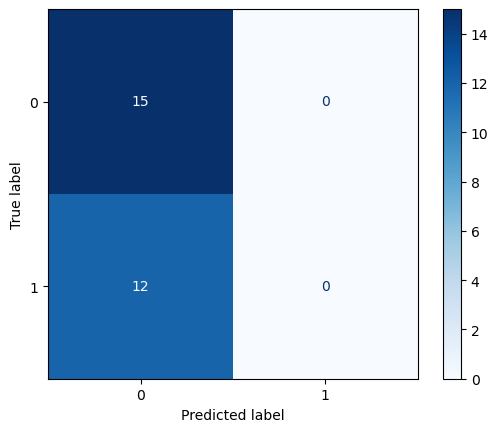

In [74]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix

# display the confusion matrix
y_pred = model_wide_deep.predict(X_test).argmax(axis=1)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.show()

In [75]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred, digits=4))

              precision    recall  f1-score   support

           0     0.5556    1.0000    0.7143        15
           1     0.0000    0.0000    0.0000        12

    accuracy                         0.5556        27
   macro avg     0.2778    0.5000    0.3571        27
weighted avg     0.3086    0.5556    0.3968        27



# Hyper parameter tuning for keras model using sklearn random grid search

In [76]:
%%time

def build_clf(meta, hidden_layer_sizes, dropout):
    n_features_in_ = meta["n_features_in_"]
    n_classes_ = meta["n_classes_"]
    target_encoder_ = meta["target_encoder_"]
    
    model = tf.keras.models.Sequential()
    model.add(keras.layers.Input(shape=n_features_in_)),
    #for hidden_layer_size in hidden_layer_sizes:
    for hidden_layer_size in hidden_layer_sizes:
        model.add(keras.layers.Dense(hidden_layer_size, 
            kernel_initializer= tf.keras.initializers.GlorotUniform(), 
            bias_initializer=keras.initializers.RandomNormal(mean=0.0, stddev=0.05, seed=None), 
            activation="relu"))
        model.add(keras.layers.Dropout(dropout))
    model.add(tf.keras.layers.Dense(1, activation='sigmoid'))
    
    #though you could return a compiled model, it's not necessary, and would result in the loss of these
    # parameters in the tune process - as they would be 'hard coded'
    # model.compile(loss = 'sparse_categorical_crossentropy', metrics = ['accuracy']) 

    return model


CPU times: total: 0 ns
Wall time: 0 ns


In [77]:
%%time

# If you don't have the following installed, from command line '!pip install scikeras'
from scikeras.wrappers import KerasClassifier

keras_clf = KerasClassifier(
    model=build_clf,
    hidden_layer_sizes=6,
    dropout=0.5,
    optimizer=keras.optimizers.Adam,
    optimizer__learning_rate=0.0001
)
keras_clf.get_params()


CPU times: total: 0 ns
Wall time: 32.6 ms


{'model': <function __main__.build_clf(meta, hidden_layer_sizes, dropout)>,
 'build_fn': None,
 'warm_start': False,
 'random_state': None,
 'optimizer': keras.optimizers.optimizer_v2.adam.Adam,
 'loss': None,
 'metrics': None,
 'batch_size': None,
 'validation_batch_size': None,
 'verbose': 1,
 'callbacks': None,
 'validation_split': 0.0,
 'shuffle': True,
 'run_eagerly': False,
 'epochs': 1,
 'hidden_layer_sizes': 6,
 'dropout': 0.5,
 'optimizer__learning_rate': 0.0001,
 'class_weight': None}

In [87]:
%%time

params = {
    
    # the following are model parameters, and therefore must be defined as parameters in the KarasClassifier, and then in the build_clf function
    'model__hidden_layer_sizes': [(70,),(90, ), (100,), (100, 90)], # this will require KarasClassifier and build_clf to have hidden_layer_sizes parameter set
    'model__dropout': [0, 0.1], # this will require KarasClassifier and build_clf to have hidden_layer_sizes parameter set
    
    # the following are 'fit' parameters, the scikeras wrapper provides these parameters. These are passed to the 'model.fit' method for each fit of the model
    'batch_size':[20, 60, 100],
    'epochs':[10],
    'optimizer':['adam','sgd'],
    'loss':['binary_crossentropy'],
    
    # this is added to the optimizer 
    'optimizer__learning_rate': [0.0001, 0.001, 0.01]

}
keras_clf.get_params()

CPU times: total: 0 ns
Wall time: 0 ns


{'model': <function __main__.build_clf(meta, hidden_layer_sizes, dropout)>,
 'build_fn': None,
 'warm_start': False,
 'random_state': None,
 'optimizer': keras.optimizers.optimizer_v2.adam.Adam,
 'loss': None,
 'metrics': None,
 'batch_size': None,
 'validation_batch_size': None,
 'verbose': 1,
 'callbacks': None,
 'validation_split': 0.0,
 'shuffle': True,
 'run_eagerly': False,
 'epochs': 1,
 'hidden_layer_sizes': 6,
 'dropout': 0.5,
 'optimizer__learning_rate': 0.0001,
 'class_weight': None}

In [ ]:
%%time

from sklearn.model_selection import RandomizedSearchCV
#from tensorflow.keras.callbacks import EarlyStopping

rnd_search_cv = RandomizedSearchCV(
    estimator=keras_clf, 
    param_distributions=params, 
    scoring='f1_macro',  # we could use any appropriate sklearn metric here (i.e. accuracy, f1_micro, f1_macro)
    n_iter=50, 
    cv=5)

# In rare cases, you may find your model training results in exceeding python's default recursion limit.
# If needed, you can increase this excersion limit by using the following code.
#import sys
#sys.setrecursionlimit(10000) # note: the default is 3000 (python 3.9)

_ = rnd_search_cv.fit(X_train, y_train,  verbose=1)

# You can create 'call back' functions. These are functions that will be called at the 
# end of each epoch. There are a number of builtin functions created for this purpose, 
# one of which is EarlyStopping -- that, based on the parameters you give, will stop
# the training process. This is useful when the algorithm is not making any significant
# gains through further training. 
#earlystop = EarlyStopping(monitor='val_loss', patience=5, verbose=0, mode='auto')
#callback = [earlystop]
#_ = rnd_search_cv.fit(X_train, y_train, callbacks=callback, verbose=0)


Epoch 1/10
1/1 [==============================] - 0s 289ms/step - loss: 13.9810
Epoch 2/10
1/1 [==============================] - 0s 4ms/step - loss: 13.7195
Epoch 3/10
1/1 [==============================] - 0s 2ms/step - loss: 13.4592
Epoch 4/10
1/1 [==============================] - 0s 3ms/step - loss: 13.1998
Epoch 5/10
1/1 [==============================] - 0s 3ms/step - loss: 12.9413
Epoch 6/10
1/1 [==============================] - 0s 3ms/step - loss: 12.6840
Epoch 7/10
1/1 [==============================] - 0s 3ms/step - loss: 12.4281
Epoch 8/10
1/1 [==============================] - 0s 3ms/step - loss: 12.1732
Epoch 9/10
1/1 [==============================] - 0s 3ms/step - loss: 11.9193
Epoch 10/10
1/1 [==============================] - 0s 58ms/step
Epoch 1/10
1/1 [==============================] - 0s 329ms/step - loss: 6.5187
Epoch 2/10
1/1 [==============================] - 0s 4ms/step - loss: 6.1994
Epoch 3/10
1/1 [==============================] - 0s 3ms/step - loss: 5.8807

In [80]:
rnd_search_cv.best_params_

{'optimizer__learning_rate': 0.01,
 'optimizer': 'adam',
 'model__hidden_layer_sizes': (90,),
 'model__dropout': 0,
 'loss': 'binary_crossentropy',
 'epochs': 10,
 'batch_size': 20}

In [81]:
best_model = rnd_search_cv.best_estimator_

In [82]:
%%time

print(f"best score {best_model.score(X_test, y_test)}")
print(f"min loss {min(best_model.history_['loss'])}")

2/2 [==============================] - 0s 2ms/step
best score 0.5185185185185185
min loss 1.5137077569961548
CPU times: total: 31.2 ms
Wall time: 96.1 ms


In [83]:
best_model.history_

defaultdict(list,
            {'loss': [5.119305610656738,
              1.9255129098892212,
              6.094133377075195,
              1.5137077569961548,
              1.574845314025879,
              1.876033902168274,
              1.7700855731964111,
              4.957487106323242,
              3.0840814113616943,
              1.9829195737838745]})

2/2 [==============================] - 0s 2ms/step


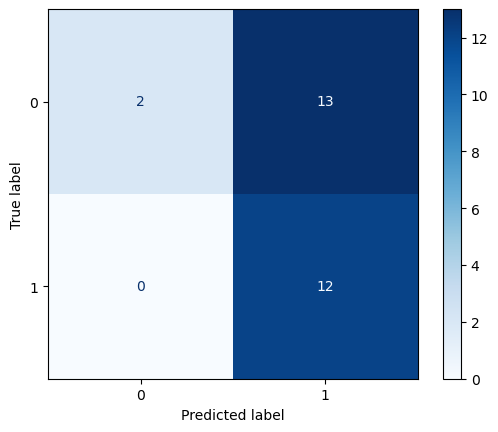

In [84]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, best_model.predict(X_test))
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.show()

In [85]:
from sklearn.metrics import classification_report

print(classification_report(y_test, best_model.predict(X_test), digits=4))

2/2 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0     1.0000    0.1333    0.2353        15
           1     0.4800    1.0000    0.6486        12

    accuracy                         0.5185        27
   macro avg     0.7400    0.5667    0.4420        27
weighted avg     0.7689    0.5185    0.4190        27

